In [9]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [10]:
fetch_housing_data()

In [11]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)#load data

In [12]:
housing = load_housing_data()
housing.head()#read top 5 row

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
housing["ocean_proximity"].value_counts()#get info of specific column

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
housing.describe()#간단한 통계 정보 보여줌 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


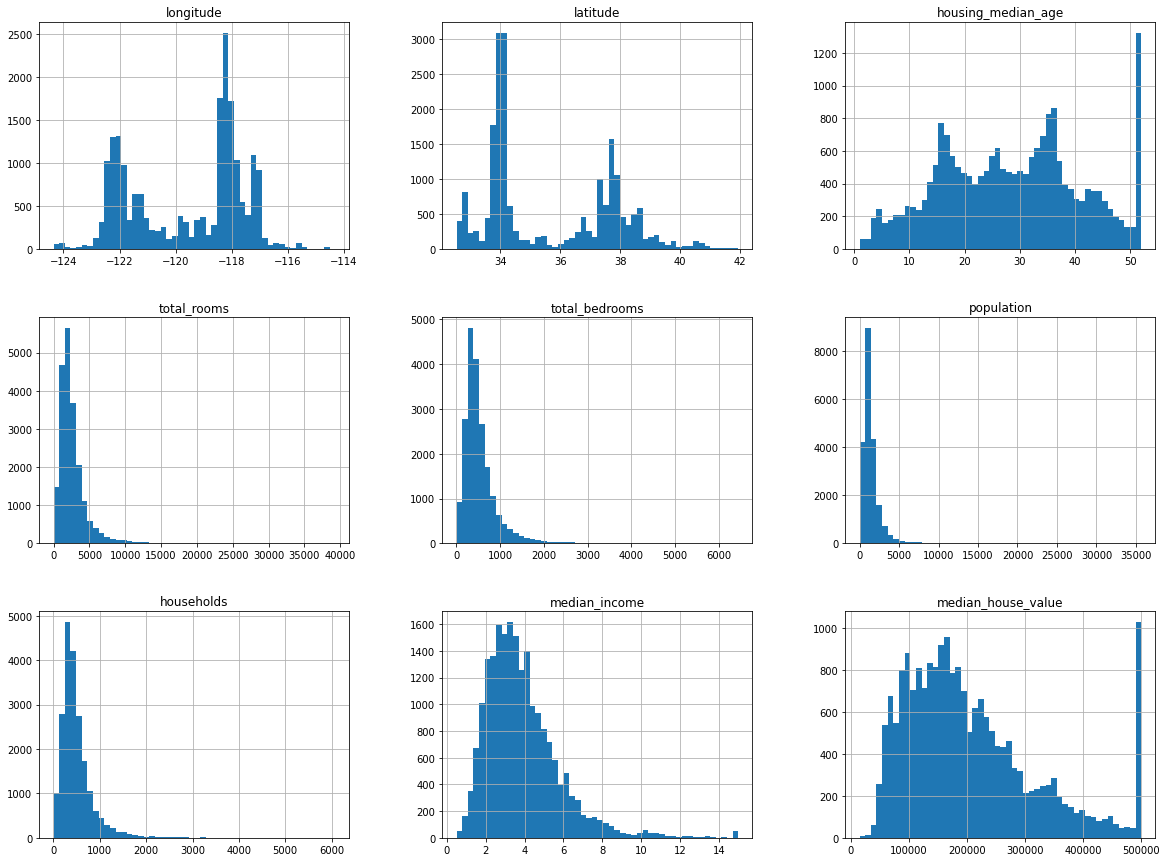

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize= (20,15))#bins should be the number of bars you want to show in your histogram plot.
plt.show()#x축이 데이터 값 , y축이 그 데이터 갯수

In [17]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))#데이터 순서 섞음 0~ len(data) -1 의 배열이 들어감
    test_set_size = int(len(data)*test_ratio)#트레인 데이터 사이즈 
    #print(shuffled_indices)
    test_indices = shuffled_indices[:test_set_size]
    #print(test_indices)
    train_indices = shuffled_indices[test_set_size:]#index 를 섞어서 테스트 트레인 구분
    #print(train_indices)
    return data.iloc[train_indices], data.iloc[test_indices]#iloc , 행 번호를 기준으로 행 데이터 읽기 
                                                            #해당하는 행의 데이터를 가져옴 

In [18]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), " ", len(test_set))

16512   4128


In [19]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    #print("id_",identifier)
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32 # 여기서 &은 비트연산자(논리 곱) masking을 위한것

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))#id_는 각각 ids[i] 가 됨, 즉 배열의 값
    return data.loc[~in_test_set], data.loc[in_test_set]#loc 은 인덱스를 기준으로 데이터 가져옴(판다스에서 할당한 인덱스)
                                                        #[]안의 값이 참인 인덱스의 데이터만 가져오게 된다!

In [20]:
housing_with_id = housing.reset_index() #index열이 추가된 data를 반환
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [21]:
from sklearn.model_selection import train_test_split#사이킷런 내장함수

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)#random_state는 seed 값 

In [22]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [23]:
#이렇게 무작위로 샘플링을 할경우 문제점 : 편향이 발생할 확률 큼, 즉 각 샘플이 대표성을 띄지 못할 수도 있다
#따라서 중요하다고 생각되는 속성을 카테고리화 해서 각각에서 동일하게 샘플링을 해줘야됨(stratified sampling)
#1. 카테고리화
housing["income_cat"] = np.ceil(housing["median_income"] /1.5)#소득의 카테고리를 제한하려고 1.5로 나누고 반올림을 해줌
housing["income_cat"].where(housing["income_cat"] < 5, 5.0 , inplace=True)#5가 넘으면 5로 제한시켜
#inplace=True returns None inplace=False returns a copy of the object with the operation performed

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state=42)
#provide indices 

for train_index, test_index in split.split(housing, housing["income_cat"]):#훈련, 테스트 2개로 쪼개서 indice 제공
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [90]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)#axis = 0 이면 index(row) axis = 1이면 column을 드랍
    #inplace 는 If False, return a copy. Otherwise, do operation inplace and return None.

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
...          ...       ...                 ...          ...             ...   
6563     -118.13     34.20                46.0       1271.0           236.0   
12053    -117.56     33.88                40.0       1196.0           294.0   
13908    -116.40     34.09                 9.0       4855.0           872.0   
11159    -118.01     33.82                31.0       1960.0           380.0   
15775    -122.45     37.77                52.0       3095.0           682.0   

       population  households  median_income  media

KeyError: "['income_cat'] not found in axis"

In [26]:
housing = strat_train_set.copy()

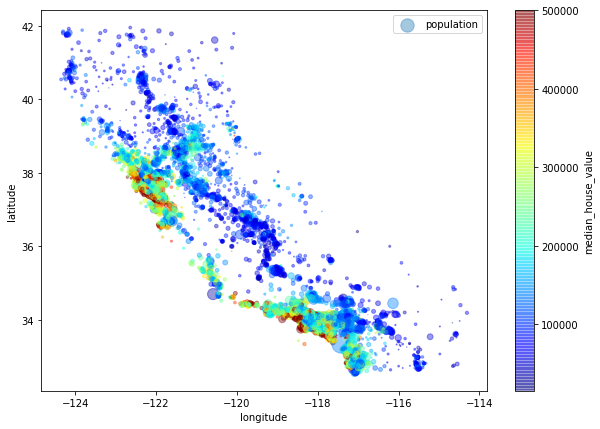

In [27]:
housing.plot(kind="scatter", x = "longitude", y = "latitude", alpha = 0.4, 
            s = housing["population"]/100, label = "population", figsize =(10,7),
            c = "median_house_value", cmap=plt.get_cmap("jet"), colorbar = True, sharex = False)
plt.legend()

In [32]:
#standard correlation coefficient 구하기 (상관관계 조사를 위해서)
corr_matrix = housing.corr()
print(corr_matrix)#특정 변수와 나머지 변수들과의 상관관계 -1~1, 값이 0 에 가까울수록 선형적인 상관관계가 없다

                          longitude  latitude  housing_median_age  \
longitude                  1.000000 -0.924478           -0.105848   
latitude                  -0.924478  1.000000            0.005766   
housing_median_age        -0.105848  0.005766            1.000000   
total_rooms                0.048871 -0.039184           -0.364509   
total_bedrooms             0.076598 -0.072419           -0.325047   
population                 0.108030 -0.115222           -0.298710   
households                 0.063070 -0.077647           -0.306428   
median_income             -0.019583 -0.075205           -0.111360   
median_house_value        -0.047432 -0.142724            0.114110   
rooms_per_household       -0.028345  0.107621           -0.147186   
bedrooms_per_room          0.095603 -0.116884            0.136788   
population_per_household  -0.000410  0.005420            0.015031   

                          total_rooms  total_bedrooms  population  households  \
longitude            

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

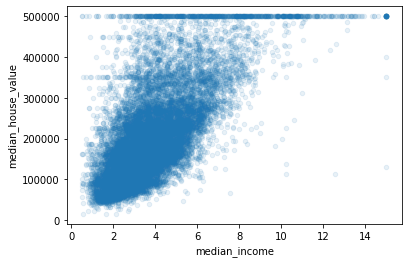

In [30]:
housing.plot(kind= "scatter", x = "median_income", y = "median_house_value", alpha= 0.1)
#500,000 상한선이라서 수평선 형태, 350,000 근처랑 280,000 근처도... -> 이상 : 제거필요성

In [31]:
#특성들을 조합해서 의미있는 특성 한개로 줄임
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [33]:
housing = strat_train_set.drop("median_house_value", axis = 1)#예측변수
housing_labels = strat_train_set["median_house_value"].copy()#레이블

In [35]:
#데이터 정제
#값이 존재하지 않았던 데이터들을 어케 처리?
#1.해당구역을 아에 제거, 2. 전체 특성을 삭제, 2. 어떤 값으로 채움(0,mean, median)
#1.housing.dropna(subset=["total_bedrooms"])
#2.housing.drop("total_bedrooms", axis = 1)
#3.median = housing["total_bedrooms"].median()
#housing["total_bedrooms"].fillna(median, inplace=True)

#누락된 값은 사이킷런 imputer로 처리 가능 
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")#중간값으로 채우겟다고 결정 시에
housing_num = housing.drop("ocean_proximity", axis =1 )#median은 숫자형에서만 나올수 있으므로 카테고리화되어있는 바다 근접성 제외
imputer.fit(housing_num)#각 특성들의 중간값을 계산해서 저장
imputer.statistics_ 

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [36]:
X = imputer.transform(housing_num)#누락된 값 채워 넣음
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = list(housing.index.values))
#결과인 numpy -> pandas Dataframe

In [37]:
#ocean proximity가 문자열이므로 정수로 변환해준다 판다스 factorize 사용
housing_cat = housing["ocean_proximity"]
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0])

In [51]:
#이렇게 정수가 된 카테고리들에 문제점은 0,1,이 가깝다고 서로 비슷하다고 인식해버린다는 문제 발생. 즉 숫자의 크고작음이 연관성에 묶이므로
#원 핫 인코딩이라는 한 카테고리가 1이면 나머진 다 0인, 이런식으로 해줘야됨
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
print(housing_cat_encoded.reshape(3,-1))#-1은 지 알아서 값 추론함 
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))#fit transfrom 안에는 2차원행렬이 들어가야함
housing_cat_1hot #sparse matrix가 리턴됨 

[[0 0 1 ... 2 2 2]
 [0 0 0 ... 0 3 2]
 [3 0 3 ... 2 0 3]]


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [56]:
#이거를 한번에 해버리는 거
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(categories='auto')
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [70]:
#나만의 데이터 변환기 
from sklearn.base import BaseEstimator, TransformerMixin

# 컬럼 인덱스
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]#: , idx 하면 0~n : ix 값 가져옴
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)#일단 이속성은 더하지 않음
housing_extra_attribs = attr_adder.transform(housing.values)#rooms_per_household , population_per_household이게 더해진 것

[[-121.89 37.29 38.0 ... '<1H OCEAN' 4.625368731563422 2.094395280235988]
 [-121.93 37.05 14.0 ... '<1H OCEAN' 6.008849557522124 2.7079646017699117]
 [-117.2 32.77 31.0 ... 'NEAR OCEAN' 4.225108225108225 2.0259740259740258]
 ...
 [-116.4 34.09 9.0 ... 'INLAND' 6.34640522875817 2.742483660130719]
 [-118.01 33.82 31.0 ... '<1H OCEAN' 5.50561797752809 3.808988764044944]
 [-122.45 37.77 52.0 ... 'NEAR BAY' 4.843505477308295 1.9859154929577465]]


In [73]:
#특성 스케일링 : 모든 특성의 범위를 같도록 만들어주는 방법 1.min-max scailing(normalization), 2.standardization
#1. 데이터에서 최솟값을 뺀 후 최대와 최소의 차이로 나누면 됨 (MinMaxScaler)
#2.평균을 뺀 후 표준편차로 나눠서 결과 분포 분산이 1이 되도록 함 -> 상한 하한이 없다는 문제 BUT 이상치 영향 적게 받음(StandardScaler)

#위와같이 데이터 변환의 과정이 복잡한경우 파이프라인을 통해서 순서대로 처리할 수있당
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])#마지막단계에는 변환기 추정기 모두 가능하지만, 그외에는 다 변환기여야함(fit(), transform()을 가지고있어야함)

housing_num_tr = num_pipeline.fit_transform(housing_num);

In [81]:
# from sklearn.base import BaseEstimater, TransformerMixin
                                                         #수치형 컬럼을 넘파이 배열로 추출하는 대신
class DataFrameSelector(BaseEstimator, TransformerMixin):#데이터프레임을 파이프라인에 직접 주입하기위한 변환기
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X , y = None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values#수치형만 뽑아서 반환 
    
num_attribs = list(housing_num)
print(num_attribs)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy = "median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(categories='auto', sparse=False)),
])
    

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


In [83]:
#위의 두개의 파이프라인을 합쳐서 병렬로 실행해서 결과를 합쳐러 리턴해줌 
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list = [
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

#사용
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 16)

In [84]:
#### FINALLY TRAIN MODEL
from sklearn.linear_model import LinearRegression#선형회귀 선택 

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [85]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("prediction : ", lin_reg.predict(some_data_prepared))

prediction :  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [86]:
print("Label : ", list(some_labels))

Label :  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [87]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [88]:
from sklearn.tree import DecisionTreeRegressor #의사결정트리로 

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [89]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
# 교차검증으로 모델 평가
#train_test_split을 써서 훈련 세트를 또 쪼개서 테스트해볼 수도 있다
#sklearn 교차검증 기능  
#K-fold cross-validation : 훈련세트를 10개의 서브셋으로 나눈뒤, 매번 다른 폴드를 선택해 평가하고 나머지 9개는 훈련에씀 이렇게 10번을 함(10개니까)
#그 결과는 10개의 평가 점수가 담긴 배열이 결과가 됨
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
print(scores)#값으로 음수가 나옴... 적을수록 좋다는 통일성을 위해 negate 
#https://stackoverflow.com/questions/21443865/scikit-learn-cross-validation-negative-values-with-mean-squared-error
tree_rmse_scores = np.sqrt(-scores)#사이킷런 교차검증에서는 비용함수가 아닌 클수록 좋은 효용함수를 사용하므로 - 사용
print(tree_rmse_scores)

In [100]:
def display_scores(scores):
    print("Scores : ", scores)
    print("Means : " , scores.mean())
    print("Standard deviation : ", scores.std())
    
display_scores(tree_rmse_scores)

Scores :  [69540.30696492 66225.44097984 71233.73506665 69121.07309124
 70633.56859711 74370.03358138 70028.73935547 71831.95275184
 76687.58467741 68760.02466581]
Means :  70843.24597316704
Standard deviation :  2806.410476896422


In [103]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores :  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Means :  69052.46136345083
Standard deviation :  2731.674001798344


In [105]:
#RandomForestRegressor 앙상블 학습
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [111]:
forest_scores= cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores :  [49626.66030963 47624.65287796 49968.67380697 51782.53613873
 49877.4034943  53324.63498739 48986.22741005 48409.92136441
 52733.27866972 49976.99442466]
Means :  50231.09834838212
Standard deviation :  1747.045008048192


In [119]:
forest_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, forest_predictions)
forest_rmse = np.sqrt(forest_mse);
forest_rmse

18627.234475852107

In [118]:
import pickle 

Pkl_Filename = "forest_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(forest_reg, file)
    
np.savetxt("forest_rmse_scores.txt", forest_rmse_scores, fmt='%d', delimiter=',')